# Load necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.min_rows",500)
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

In [3]:
 ##Load the dataset
loan = pd.read_csv("loan.csv")
loan.head()

C:\Users\priya\AppData\Local\Temp\ipykernel_9192\4086694045.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
## Checking shape of data
loan.shape

(39717, 111)

## Drop columns

In [6]:
## Check null values for all column
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [7]:
## As we can see lots of columns are null lets first delete such columns
loan.dropna( axis=1, how='all', inplace=True)

In [8]:
## Re-Checking shape of data
loan.shape

(39717, 57)

In [9]:
nunique = loan.nunique()
nunique

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

## Deleting columns with same value across all rows

In [11]:
nunique_columns = nunique[nunique == 1].index
loan.drop(nunique_columns, axis=1,inplace=True)

In [12]:
## Recheck the format
loan.shape

(39717, 48)

In [13]:
## Check if 1 member have multiple loans if not then we are good to delete id
loan[loan.duplicated('member_id')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


## Dropping columns not req for analysis
id<br/>
installment<br/>
url<br/>
desc<br/>
title<br/>
zip_code<br/>
delinq_2yrs<br/>
earliest_cr_line<br/>
inq_last_6mths<br/>
mths_since_last_delinq<br/>
mths_since_last_record<br/>
revol_util<br/>
total_acc<br/>
out_prncp<br/>
out_prncp_inv<br/>
total_pymnt<br/>
total_pymnt_inv<br/>
total_rec_prncp<br/>
total_rec_int<br/>
total_rec_late_fee<br/>
recoveries<br/>
collection_recovery_fee<br/>
last_pymnt_d<br/>
last_pymnt_amnt<br/>
next_pymnt_d<br/>
last_credit_pull_d<br/>


In [15]:
loan.drop(columns=['id','installment','url','desc','title','zip_code','delinq_2yrs','earliest_cr_line','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d'],inplace=True, axis=1)

In [16]:
## Recheck shape
loan.shape

(39717, 22)

In [17]:
## Selecting rows only Fully paid and current
loan=loan[loan.loan_status!='Current']

In [18]:
## Recheck shape
loan.shape

(38577, 22)

## Format correction and Imputation if required

In [20]:
loan.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,revol_bal,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65%,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,3,0,13648,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,3,0,1687,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,2,0,2956,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,10,0,5598,0.0
5,1311441,5000,5000,5000.0,36 months,7.90%,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,9,0,7963,0.0


In [21]:
loan.dtypes

member_id                 int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
pub_rec_bankruptcies    float64
dtype: object

In [22]:
## Correcting the data format for term and interest rate
loan.term=loan.term.apply(lambda x: x.replace('months',''))
loan.int_rate = loan.int_rate.apply(lambda x : x.replace('%',''))
loan.term=loan.term.astype("int32")
loan.int_rate=loan.int_rate.astype("float")

In [23]:
## Lets create bins for interest rate
int_rate_bins = [0,5,12,14,16,18,20]
int_rate_labels=['0-5%','5-12%','12-14%','14-16%','16-18%','more than 18%']
loan['int_rate_group'] = pd.cut(loan['int_rate'], bins=int_rate_bins,labels=int_rate_labels)

In [24]:
## Recheck dttypes
loan.dtypes

member_id                  int64
loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv          float64
term                       int32
int_rate                 float64
grade                     object
sub_grade                 object
emp_title                 object
emp_length                object
home_ownership            object
annual_inc               float64
verification_status       object
issue_d                   object
loan_status               object
purpose                   object
addr_state                object
dti                      float64
open_acc                   int64
pub_rec                    int64
revol_bal                  int64
pub_rec_bankruptcies     float64
int_rate_group          category
dtype: object

In [25]:
## Check if all values are available for analysis or we need data imputation
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   member_id             38577 non-null  int64   
 1   loan_amnt             38577 non-null  int64   
 2   funded_amnt           38577 non-null  int64   
 3   funded_amnt_inv       38577 non-null  float64 
 4   term                  38577 non-null  int32   
 5   int_rate              38577 non-null  float64 
 6   grade                 38577 non-null  object  
 7   sub_grade             38577 non-null  object  
 8   emp_title             36191 non-null  object  
 9   emp_length            37544 non-null  object  
 10  home_ownership        38577 non-null  object  
 11  annual_inc            38577 non-null  float64 
 12  verification_status   38577 non-null  object  
 13  issue_d               38577 non-null  object  
 14  loan_status           38577 non-null  object  
 15  purpose

In [26]:
## emp_length and emp_title have few null/missing value lets fill these with most occurence text
print("Mode : " + loan.emp_length.mode()[0])
loan.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [27]:
loan.emp_length.fillna(loan.emp_length.mode()[0],inplace=True)

C:\Users\priya\AppData\Local\Temp\ipykernel_9192\95798462.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan.emp_length.fillna(loan.emp_length.mode()[0],inplace=True)


In [28]:
loan.emp_title.mode()[0]

'US Army'

In [29]:
loan.emp_title.fillna(loan.emp_title.mode()[0],inplace=True)

C:\Users\priya\AppData\Local\Temp\ipykernel_9192\153737044.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan.emp_title.fillna(loan.emp_title.mode()[0],inplace=True)


In [30]:
## Check if all values are available for analysis 
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   member_id             38577 non-null  int64   
 1   loan_amnt             38577 non-null  int64   
 2   funded_amnt           38577 non-null  int64   
 3   funded_amnt_inv       38577 non-null  float64 
 4   term                  38577 non-null  int32   
 5   int_rate              38577 non-null  float64 
 6   grade                 38577 non-null  object  
 7   sub_grade             38577 non-null  object  
 8   emp_title             38577 non-null  object  
 9   emp_length            38577 non-null  object  
 10  home_ownership        38577 non-null  object  
 11  annual_inc            38577 non-null  float64 
 12  verification_status   38577 non-null  object  
 13  issue_d               38577 non-null  object  
 14  loan_status           38577 non-null  object  
 15  purpose

In [31]:
## All values looks good now lets break issue_d with year and month column
loan['issue_d_year']=loan.issue_d.apply(lambda x: x.split('-')[1
                                        ])
loan['issue_d_month']=loan.issue_d.apply(lambda x: x.split('-')[0])

In [32]:
## Subgrades are category from 1-5 mapping accordingly
loan.sub_grade=loan.sub_grade.apply(lambda x: x[1])

In [33]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   member_id             38577 non-null  int64   
 1   loan_amnt             38577 non-null  int64   
 2   funded_amnt           38577 non-null  int64   
 3   funded_amnt_inv       38577 non-null  float64 
 4   term                  38577 non-null  int32   
 5   int_rate              38577 non-null  float64 
 6   grade                 38577 non-null  object  
 7   sub_grade             38577 non-null  object  
 8   emp_title             38577 non-null  object  
 9   emp_length            38577 non-null  object  
 10  home_ownership        38577 non-null  object  
 11  annual_inc            38577 non-null  float64 
 12  verification_status   38577 non-null  object  
 13  issue_d               38577 non-null  object  
 14  loan_status           38577 non-null  object  
 15  purpose

## Outlier Treatment

<Figure size 1400x2000 with 0 Axes>

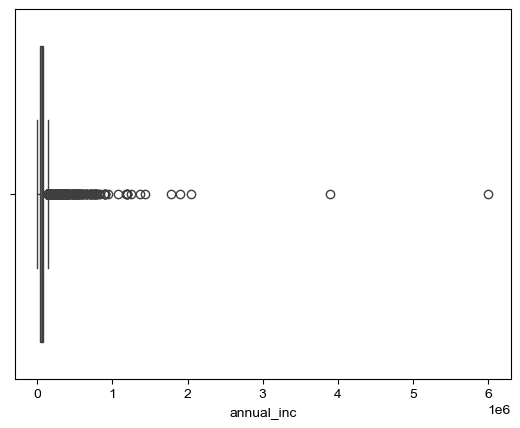

<Figure size 1400x2000 with 0 Axes>

In [35]:
ax=sns.boxplot(x=loan['annual_inc'])
sns.set(style='whitegrid')
plt.figure(figsize=(14,20))

In [36]:
loan.annual_inc.quantile([0.5,0.75,0.8,0.9,0.95])

0.50     58868.0
0.75     82000.0
0.80     90000.0
0.90    115000.0
0.95    140004.0
Name: annual_inc, dtype: float64

In [37]:

annual_inc_90_percentile = loan['annual_inc'].quantile(0.90)
loan = loan[loan.annual_inc <= annual_inc_90_percentile]

<Figure size 1400x2000 with 0 Axes>

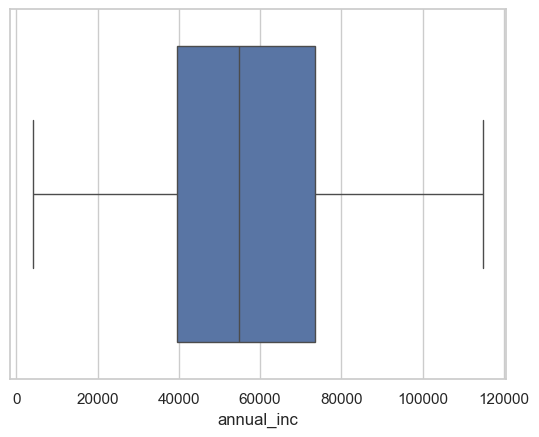

<Figure size 1400x2000 with 0 Axes>

In [38]:
ax=sns.boxplot(x=loan['annual_inc'])
sns.set(style='whitegrid')
plt.figure(figsize=(14,20))

<Figure size 1400x2000 with 0 Axes>

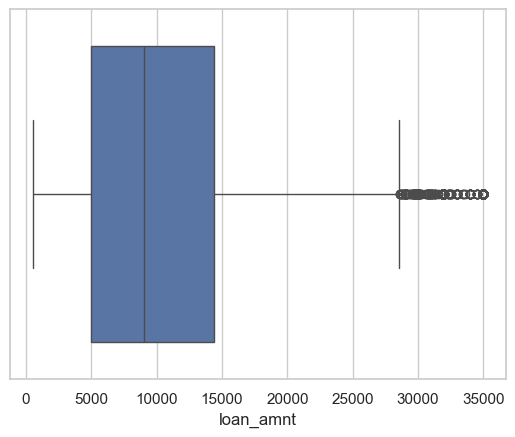

<Figure size 1400x2000 with 0 Axes>

In [39]:
ax=sns.boxplot(x=loan['loan_amnt'])
sns.set(style='whitegrid')
plt.figure(figsize=(14,20))

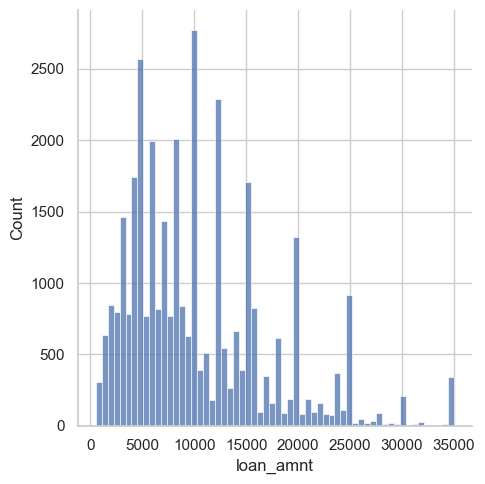

In [40]:

sns.displot(loan, x="loan_amnt")

In [41]:
loan.loan_amnt.quantile([0.5,0.75,0.8,0.9,0.95])
## Not removing this as annual income can be different and our focus is loan amount

0.50     9000.0
0.75    14400.0
0.80    15000.0
0.90    20000.0
0.95    25000.0
Name: loan_amnt, dtype: float64

In [42]:
## from histogram it seems >95 percentile is not much so removing this
loan_amnt_95_percentile = loan['loan_amnt'].quantile(0.95)
loan = loan[loan.loan_amnt <= loan_amnt_95_percentile]

In [43]:
## Lets create bins for annaul innome 
dti_labels=['0-5','5-10','10-15','15-20','>20']
dti_bins=[0,5,10,15,20,30]
loan['dti_group'] = pd.cut(loan['dti'], bins=dti_bins,labels=dti_labels)

In [44]:
## Lets create bins for loan_amount analysis
amnt_bins = [0,500, 1000, 5000, 10000, 15000, 25000,35000]
bin_labels=['500','500-1k','1k-5k','5k-10k','10k-15k','15k-25k','>25K']
loan['loan_amnt_group'] = pd.cut(loan['loan_amnt'], bins=amnt_bins,labels=bin_labels)

In [45]:
## Lets create bins for annaul innome 
annual_inc_bins = [0,4000, 10000, 20000, 30000, 40000, 50000,60000,70000,80000,90000,200000]
annual_labels=['upto 4k','4k-10k','10k-20k','20k-30k','30k-40k','40k-50k','50k-60K','60k-70k','70k-80k','80k-90k','>90k']
loan['annual_inc_group'] = pd.cut(loan['annual_inc'], bins=annual_inc_bins,labels=annual_labels)

# Univariate Analysis(Categorical Data)

## 1. How many loans are charged off

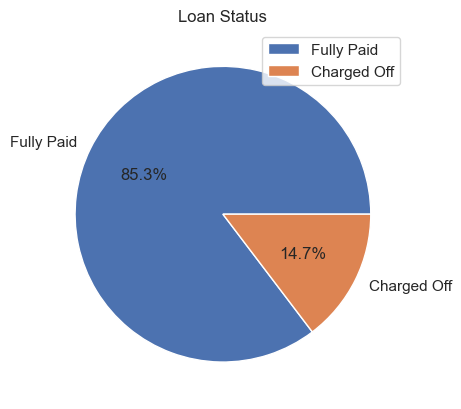

In [48]:
x = loan.loan_status.value_counts() 
plt.pie(x.values, 
        labels=x.index, 
        autopct='%1.1f%%')
plt.title('Loan Status')
plt.legend()
plt.show() 

## 2. Percentage distribution of charged off loan for term

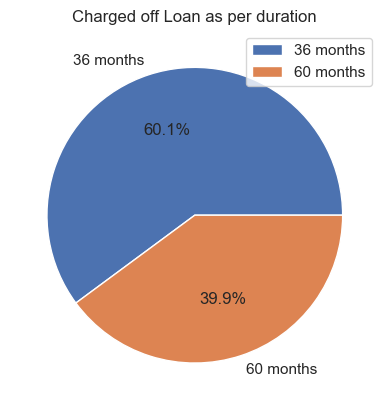

In [50]:
x = loan[loan.loan_status=='Charged Off'].term.value_counts() 
term_labels = ["36 months", "60 months"]
plt.pie(x.values, 
        labels=term_labels, 
        autopct='%1.1f%%')
plt.title('Charged off Loan as per duration')
plt.legend()
plt.show() 

In [51]:
## 3. Loan amount distribution(only chrged off loan)

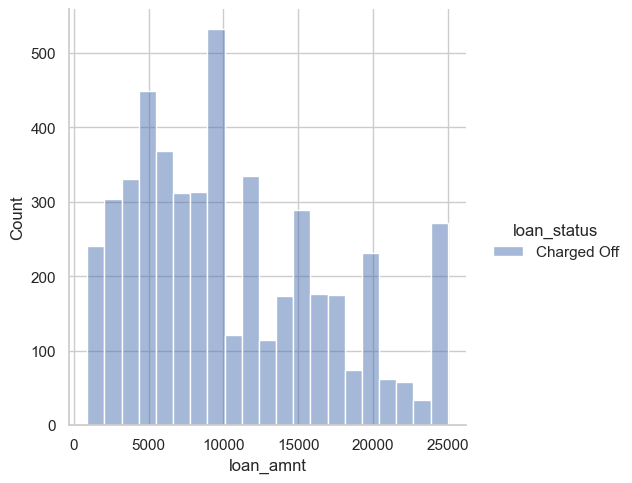

In [52]:
ax = sns.displot(loan[loan.loan_status=='Charged Off'], x="loan_amnt",hue="loan_status")
ax.fig.set_dpi(100)
plt.show()

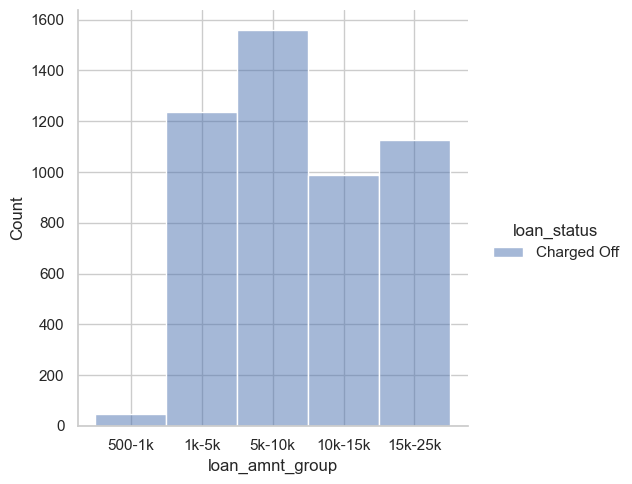

In [53]:
ax = sns.displot(loan[loan.loan_status=='Charged Off'], x="loan_amnt_group",hue="loan_status")
ax.fig.set_dpi(100)
plt.show()

# Bivariate & Multivariate analysis

### 4.grades/subgrades which have mostly defaulted

Text(0.5, 1.0, 'Grade wise charged off loans')

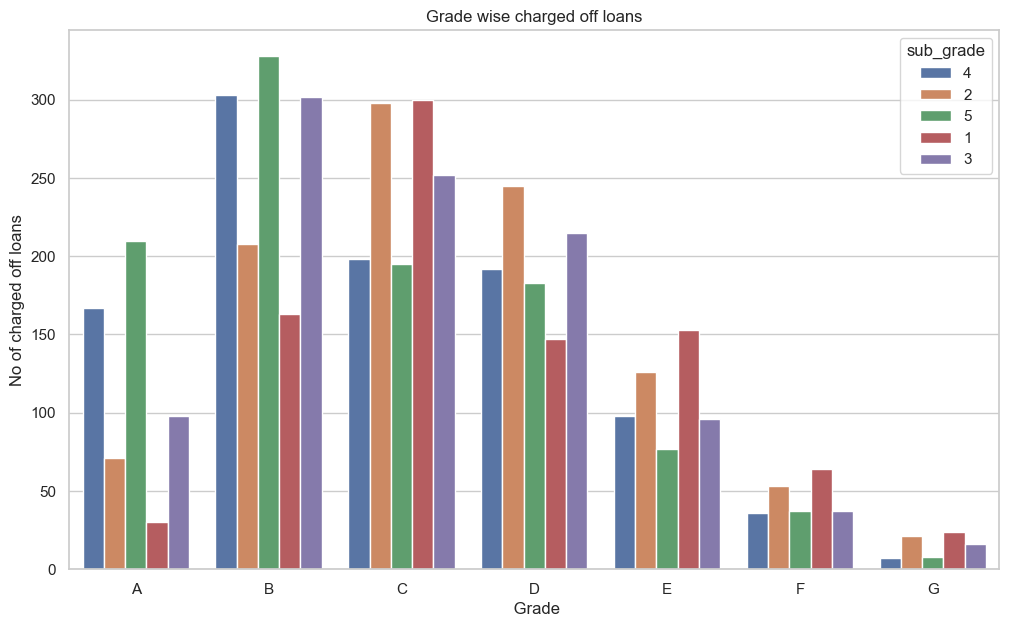

In [56]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'grade',order=['A','B','C','D','E','F','G'], hue = 'sub_grade',data = loan[loan.loan_status=='Charged Off'])
plt.xlabel(" Grade")
plt.ylabel("No of charged off loans")
plt.title("Grade wise charged off loans")


### 5. Loan Amount Group which have most defaulted

In [58]:
def showPercentageAnnotation(ax):
    # Calculate the total count for each container
    totals = []
    for container in ax.containers:
        total = 0
        for bar in container:
            total += bar.get_height()
        totals.append(total)

    # Add value labels as percentages inside the bar
    for i, container in enumerate(ax.containers):
        for j, bar in enumerate(container):
            ax.annotate(str(round(bar.get_height()/totals[i]*100, 2)) + '%', 
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

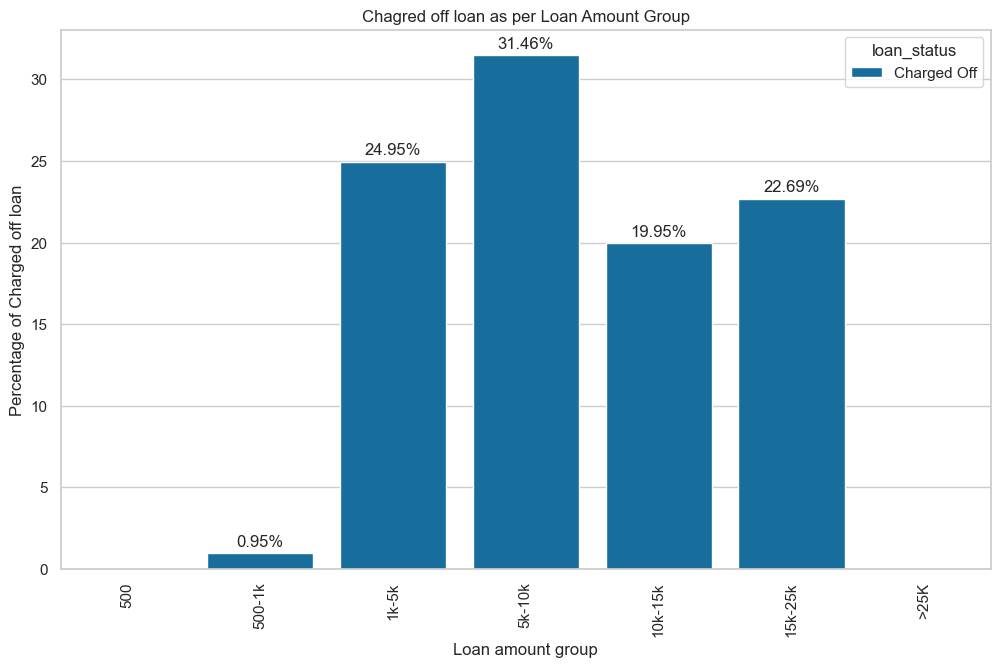

In [59]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_style('whitegrid')
ax = sns.countplot(x = 'loan_amnt_group', hue = 'loan_status',data = loan[loan.loan_status=='Charged Off'],palette='colorblind',stat="percent")
plt.xticks(rotation='vertical')
plt.ylabel("Percentage of Charged off loan")
plt.xlabel("Loan amount group")
plt.title("Chagred off loan as per Loan Amount Group")
showPercentageAnnotation(ax)

plt.show()

### 6. DTI Group which have most defaulted

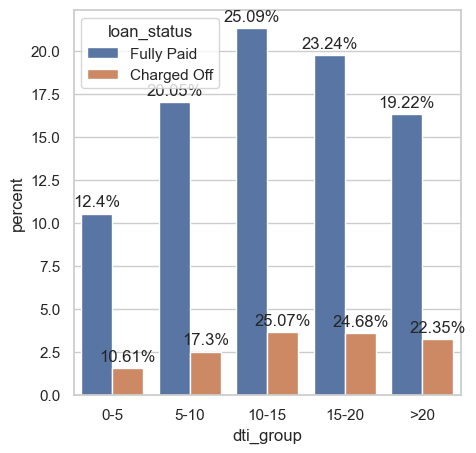

In [61]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data =loan, x='dti_group', hue ='loan_status',stat='percent')
showPercentageAnnotation(ax)
plt.show()

### 7. Annual Income Group which have most defaulted

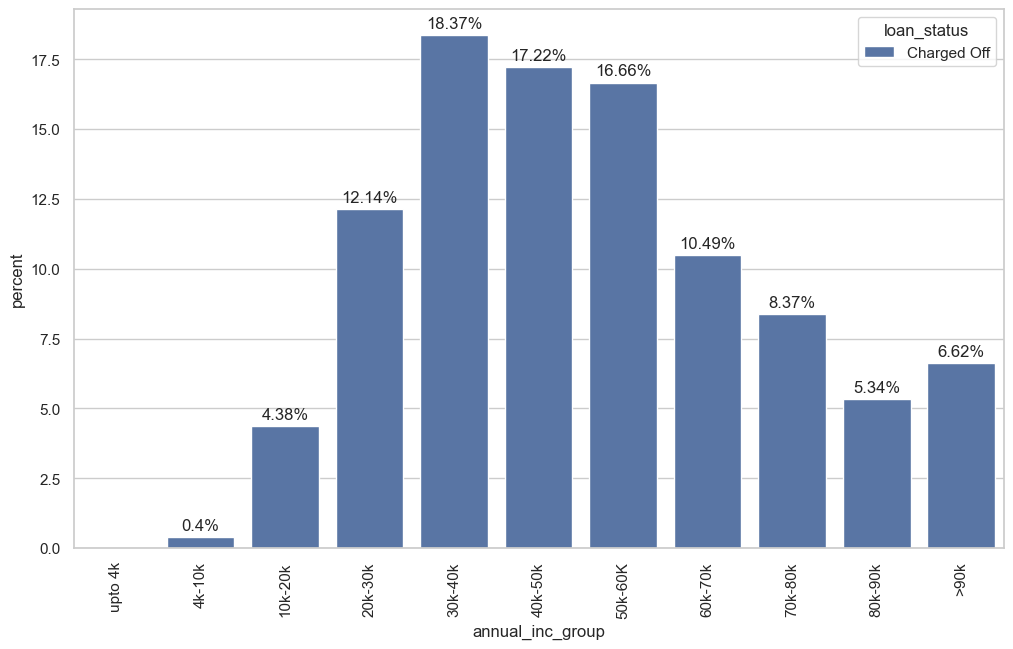

In [63]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'annual_inc_group', hue = 'loan_status',data = loan[loan.loan_status=='Charged Off'],stat='percent')
showPercentageAnnotation(ax)
plt.xticks(rotation='vertical')
plt.draw()

### 8. Relation between loan status and interest rate

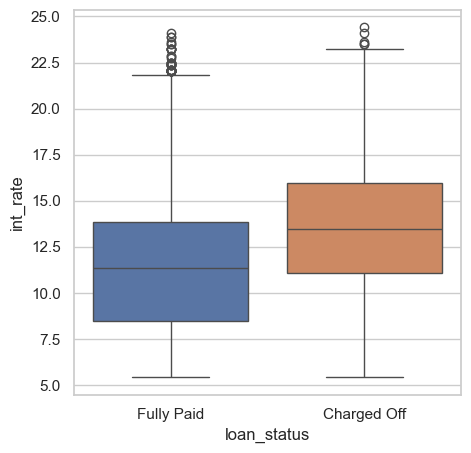

In [65]:
plt.figure(figsize=(5,5))
sns.boxplot(data =loan, x='loan_status', y='int_rate', hue ='loan_status')
plt.show()

### 9. Employeement length and impact on charged off loan

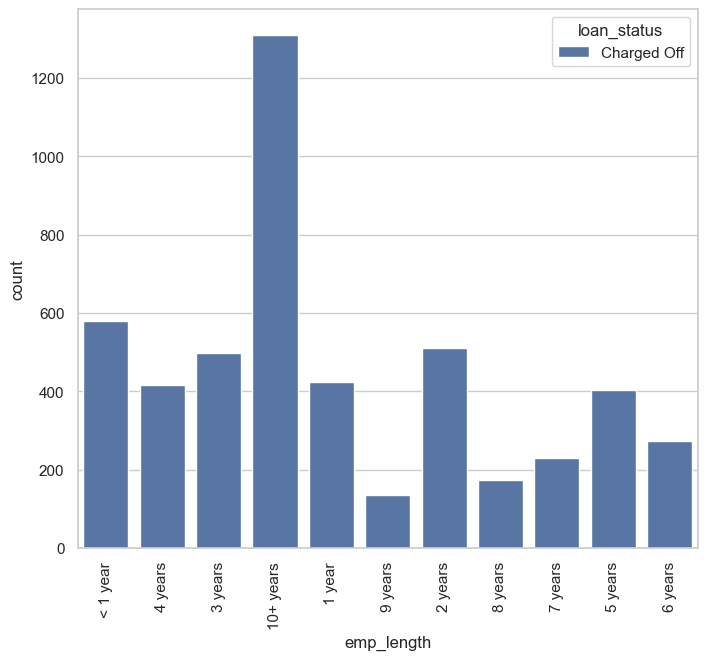

In [67]:
fig, ax = plt.subplots(figsize=(8,7))
sns.countplot(x = 'emp_length', hue = 'loan_status',data = loan[loan.loan_status=='Charged Off'])
plt.xticks(rotation='vertical')
plt.show()


### 10. Verification status and impact on charged off loan

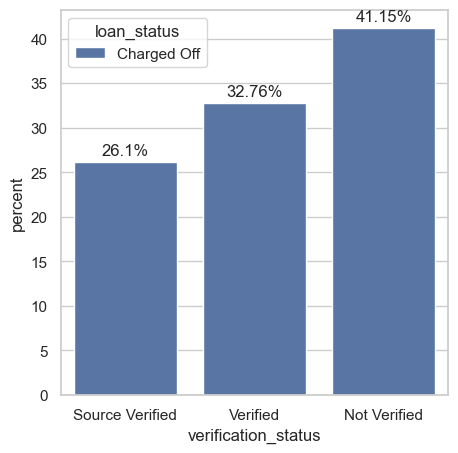

In [69]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x = 'verification_status', hue = 'loan_status',data = loan[loan.loan_status=='Charged Off'], stat="percent")
showPercentageAnnotation(ax)

### 11. Loan issue year and impact on charged off loan

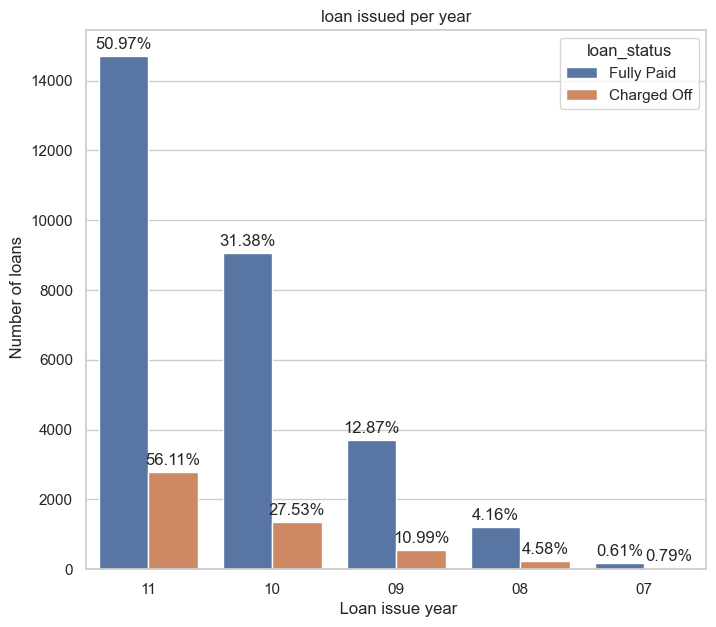

In [71]:
fig, ax = plt.subplots(figsize=(8,7))
sns.countplot(x = 'issue_d_year', hue = 'loan_status',data = loan)
plt.xlabel(" Loan issue year")
plt.ylabel(" Number of loans")
plt.title("loan issued per year")
showPercentageAnnotation(ax)

### 12. Loan issue month and impact on charged off loan

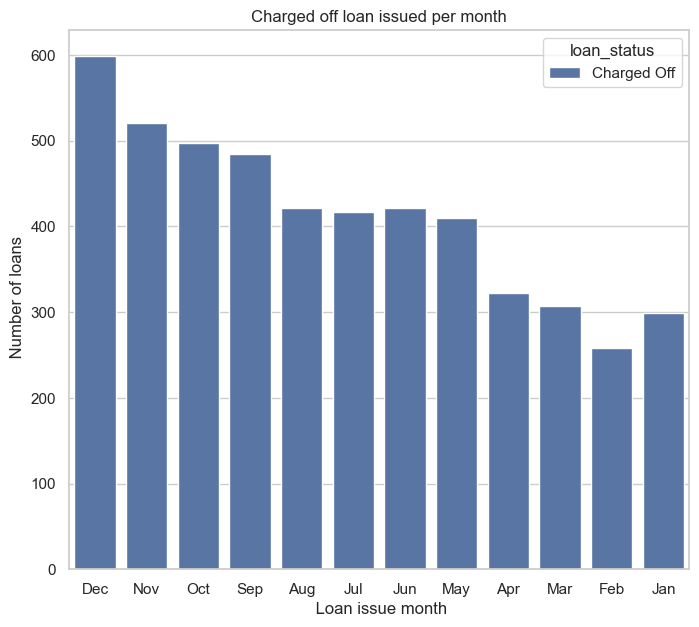

In [73]:
fig, ax = plt.subplots(figsize=(8,7))
sns.countplot(x = 'issue_d_month', hue = 'loan_status',data = loan[loan.loan_status=='Charged Off'])
plt.xlabel(" Loan issue month")
plt.ylabel(" Number of loans")
plt.title("Charged off loan issued per month")
plt.draw()

### 13. Purpose and impact on charged off loan

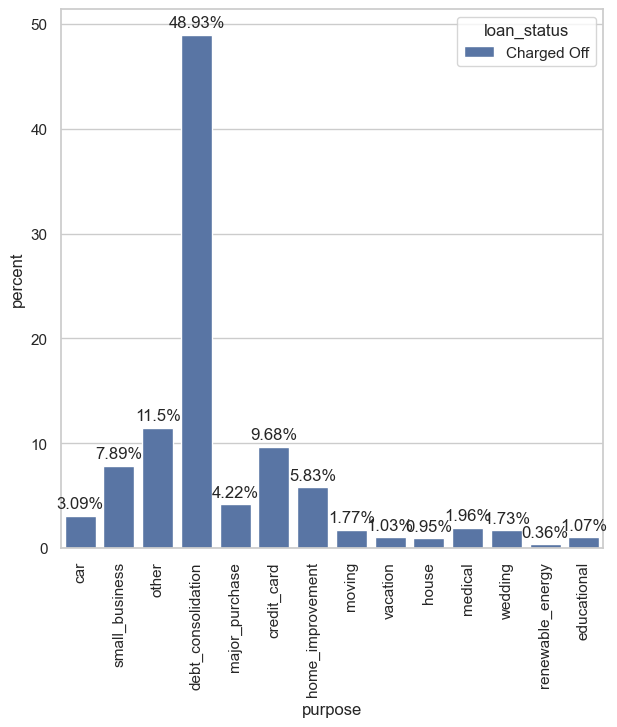

In [75]:
plt.subplots(figsize=(7,7))
ax =sns.countplot(x = 'purpose', hue = 'loan_status',data = loan[loan.loan_status=='Charged Off'],stat="percent")
showPercentageAnnotation(ax)
plt.xticks(rotation='vertical')
plt.show()

### 14. Home Ownership and impact on charged off loan

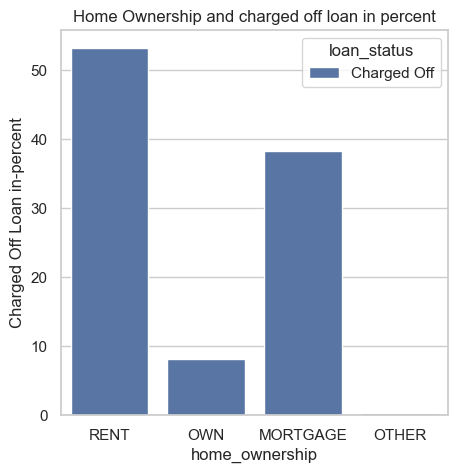

In [77]:
fig, ax = plt.subplots(figsize = (5,5))
sns.countplot(x='home_ownership', hue = 'loan_status',data = loan[loan.loan_status=='Charged Off'],stat="percent")
ax.set(ylabel='Charged Off Loan in-percent', title='Home Ownership and charged off loan in percent')
plt.show()

### 14. interest rate and impact on charged off loan

<Axes: xlabel='int_rate_group', ylabel='count'>

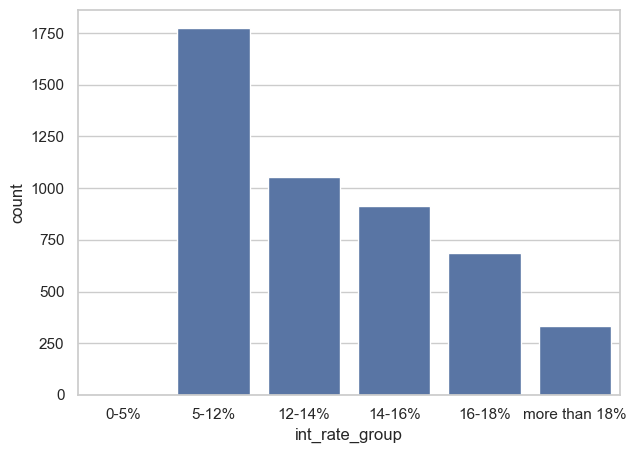

In [79]:
fig,ax = plt.subplots(figsize = (7,5))
sns.countplot(x='int_rate_group', data=loan[loan['loan_status']=='Charged Off'])

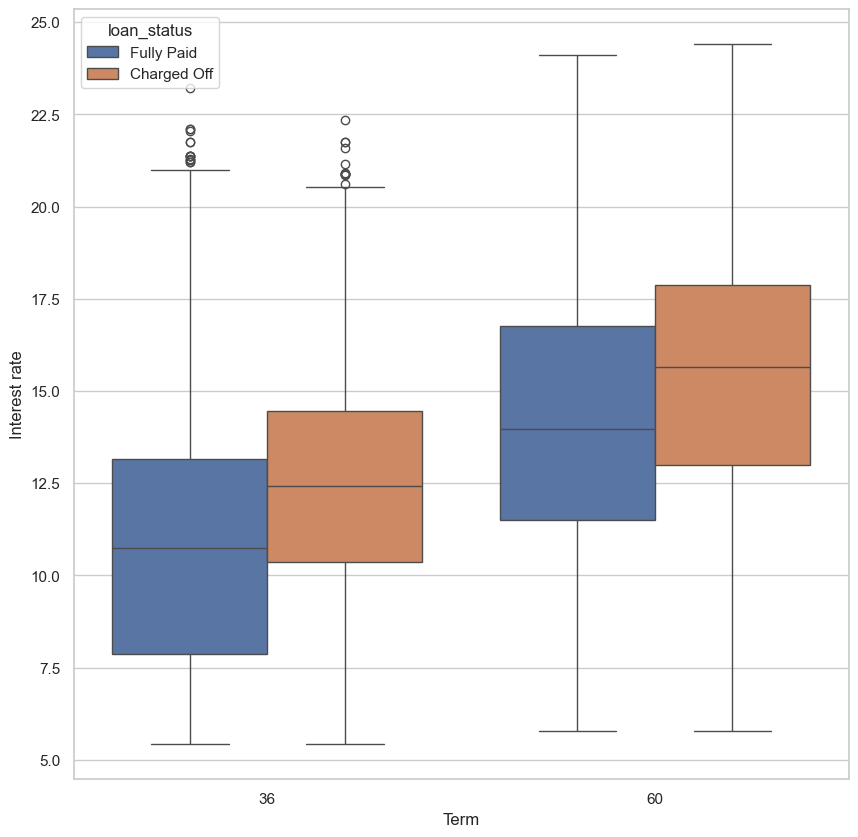

In [80]:
plt.figure(figsize=(10,10))
ax=sns.boxplot(data =loan,y='int_rate', x='term', hue ='loan_status',palette="deep")
plt.xlabel("Term")
plt.ylabel('Interest rate')
plt.show()

### 15. Pub_rec and impact on charged off loan

<Axes: xlabel='pub_rec', ylabel='count'>

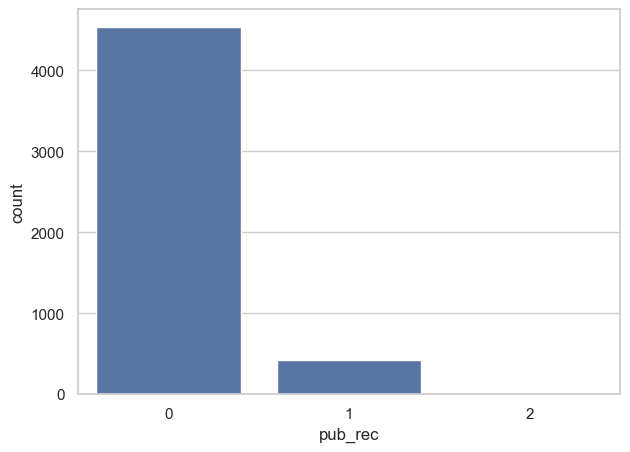

In [82]:
fig,ax = plt.subplots(figsize = (7,5))
sns.countplot(x='pub_rec', data=loan[loan['loan_status']=='Charged Off'])

In [83]:
print(loan.corr(numeric_only=True))

                      member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
member_id              1.000000   0.048690     0.061878         0.194842   
loan_amnt              0.048690   1.000000     0.981388         0.925020   
funded_amnt            0.061878   0.981388     1.000000         0.944242   
funded_amnt_inv        0.194842   0.925020     0.944242         1.000000   
term                   0.169152   0.300856     0.282418         0.310641   
int_rate               0.023572   0.236095     0.246133         0.241511   
annual_inc             0.014728   0.364728     0.361459         0.342279   
dti                    0.093397   0.097792     0.097251         0.106727   
open_acc               0.008455   0.164475     0.161989         0.148777   
pub_rec               -0.012822  -0.040180    -0.039521        -0.041720   
revol_bal             -0.014807   0.298555     0.290645         0.268558   
pub_rec_bankruptcies  -0.002654  -0.025795    -0.025087        -0.030613   

           

In [84]:
loan[loan['loan_status']=='Charged Off']

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,revol_bal,pub_rec_bankruptcies,int_rate_group,issue_d_year,issue_d_month,dti_group,loan_amnt_group,annual_inc_group
1,1314167,2500,2500,2500.000000,60,15.27,C,4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,3,0,1687,0.0,14-16%,11,Dec,0-5,1k-5k,20k-30k
8,1306957,5600,5600,5600.000000,60,21.28,F,2,US Army,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,small_business,CA,5.55,11,0,5210,0.0,NaN,11,Dec,5-10,5k-10k,30k-40k
9,1306721,5375,5375,5350.000000,60,12.69,B,5,Starbucks,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,other,TX,18.08,2,0,9279,0.0,12-14%,11,Dec,15-20,5k-10k,10k-20k
12,1298717,9000,9000,9000.000000,36,13.49,C,1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,debt_consolidation,VA,10.08,4,0,10452,0.0,12-14%,11,Dec,10-15,5k-10k,20k-30k
14,1303503,10000,10000,10000.000000,36,10.65,B,2,SFMTA,3 years,RENT,100000.00,Source Verified,Dec-11,Charged Off,other,CA,7.06,14,0,11997,0.0,5-12%,11,Dec,5-10,5k-10k,>90k
21,1269083,21000,21000,21000.000000,36,12.42,B,4,Osram Sylvania,10+ years,RENT,105000.00,Verified,Dec-11,Charged Off,debt_consolidation,FL,13.22,7,0,32135,0.0,12-14%,11,Dec,10-15,15k-25k,>90k
24,1304634,6000,6000,6000.000000,36,11.71,B,3,bmg-educational,1 year,RENT,76000.00,Not Verified,Dec-11,Charged Off,major_purchase,CA,2.40,7,0,5963,0.0,5-12%,11,Dec,0-5,5k-10k,70k-80k
26,1304679,15000,15000,8725.000000,36,14.27,C,2,nyc transit,9 years,RENT,60000.00,Not Verified,Dec-11,Charged Off,debt_consolidation,NY,15.22,7,0,5872,0.0,14-16%,11,Dec,15-20,10k-15k,50k-60K
27,1304764,5000,5000,5000.000000,60,16.77,D,2,Frito Lay,2 years,RENT,50004.00,Not Verified,Dec-11,Charged Off,other,PA,13.97,14,0,4345,0.0,16-18%,11,Dec,10-15,1k-5k,50k-60K
46,1304521,5000,5000,5000.000000,36,8.90,A,5,STERIS Corporation,10+ years,MORTGAGE,100000.00,Source Verified,Dec-11,Charged Off,debt_consolidation,OH,16.33,17,0,74351,0.0,5-12%,11,Dec,15-20,1k-5k,>90k


### 16. Heat map to show relation between all numeric variables

<Axes: >

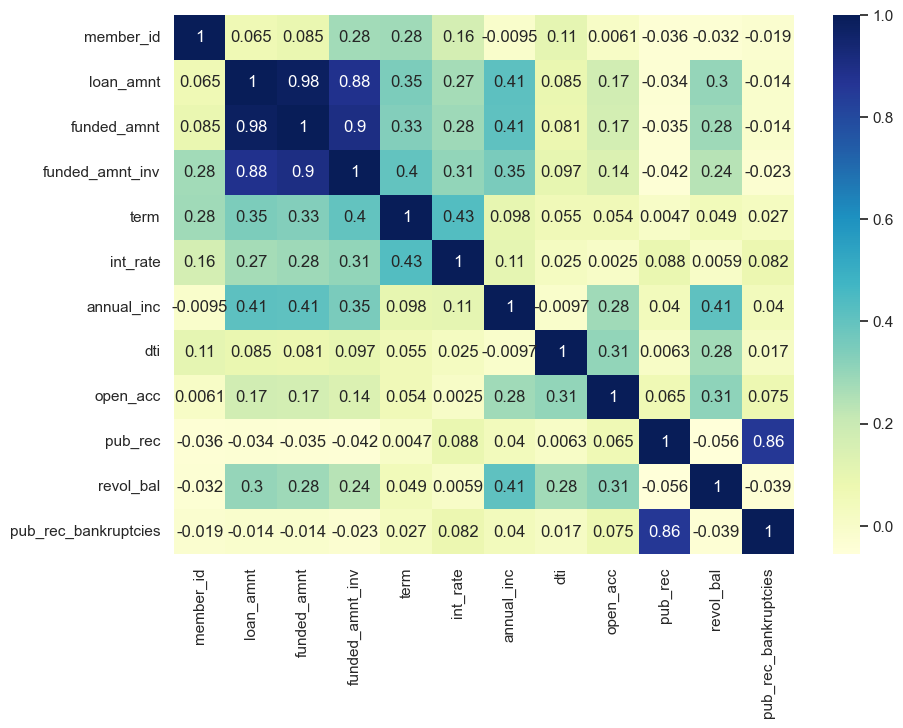

In [86]:
fig,ax = plt.subplots(figsize = (10,7))
sns.heatmap(loan[loan.loan_status=='Charged Off'].corr(numeric_only=True), cmap="YlGnBu", annot=True)

### 16. Analysis of annual income and purpose with respect to charged off loans

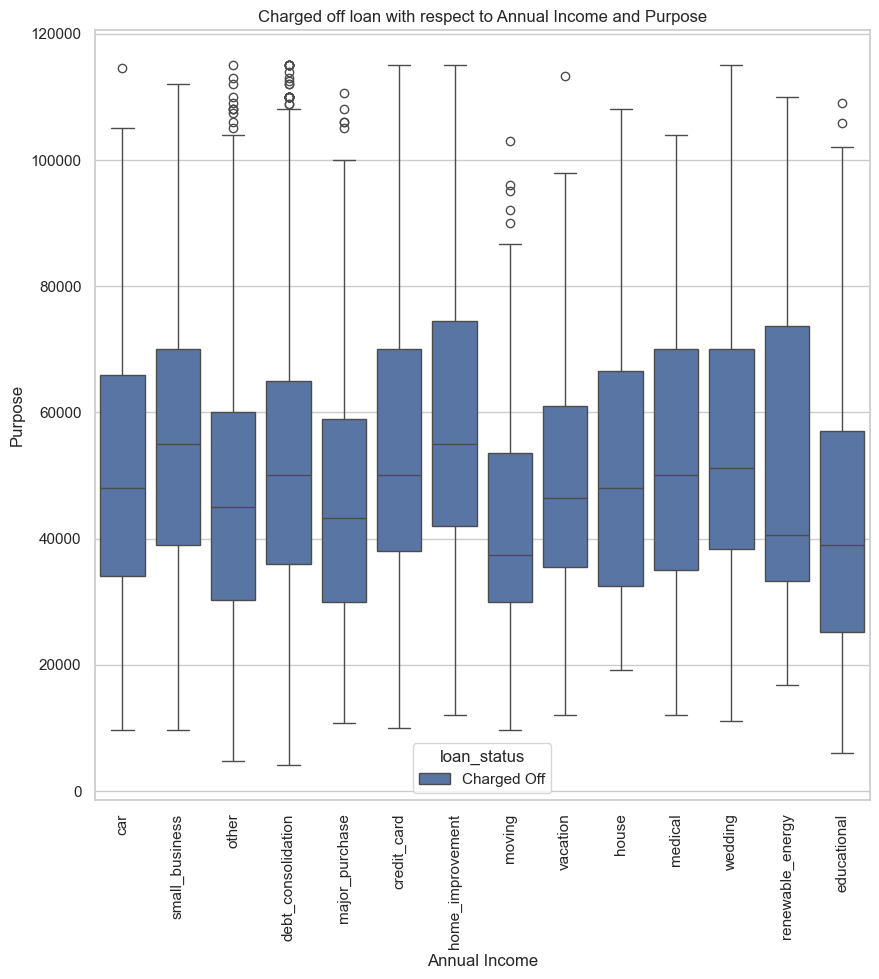

In [88]:
plt.figure(figsize=(10,10))
ax=sns.boxplot(data =loan[loan.loan_status=='Charged Off'],y='annual_inc', x='purpose', hue ='loan_status',palette="deep")
plt.xlabel("Annual Income")
plt.ylabel("Purpose")
plt.xticks(rotation='vertical')
plt.title("Charged off loan with respect to Annual Income and Purpose")
##showPercentageAnnotation(ax)
plt.show()

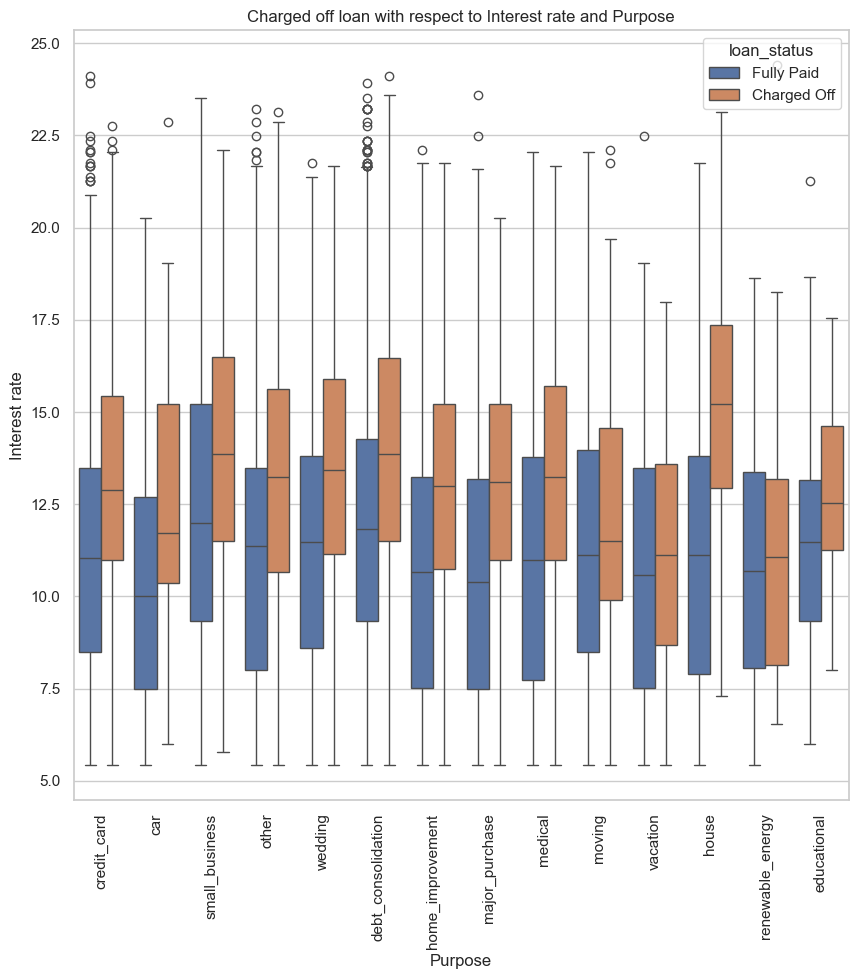

In [89]:
plt.figure(figsize=(10,10))
ax=sns.boxplot(data =loan,y='int_rate', x='purpose', hue ='loan_status',palette="deep")
plt.xlabel("Purpose")
plt.ylabel("Interest rate")
plt.xticks(rotation='vertical')
plt.title("Charged off loan with respect to Interest rate and Purpose")
plt.show()

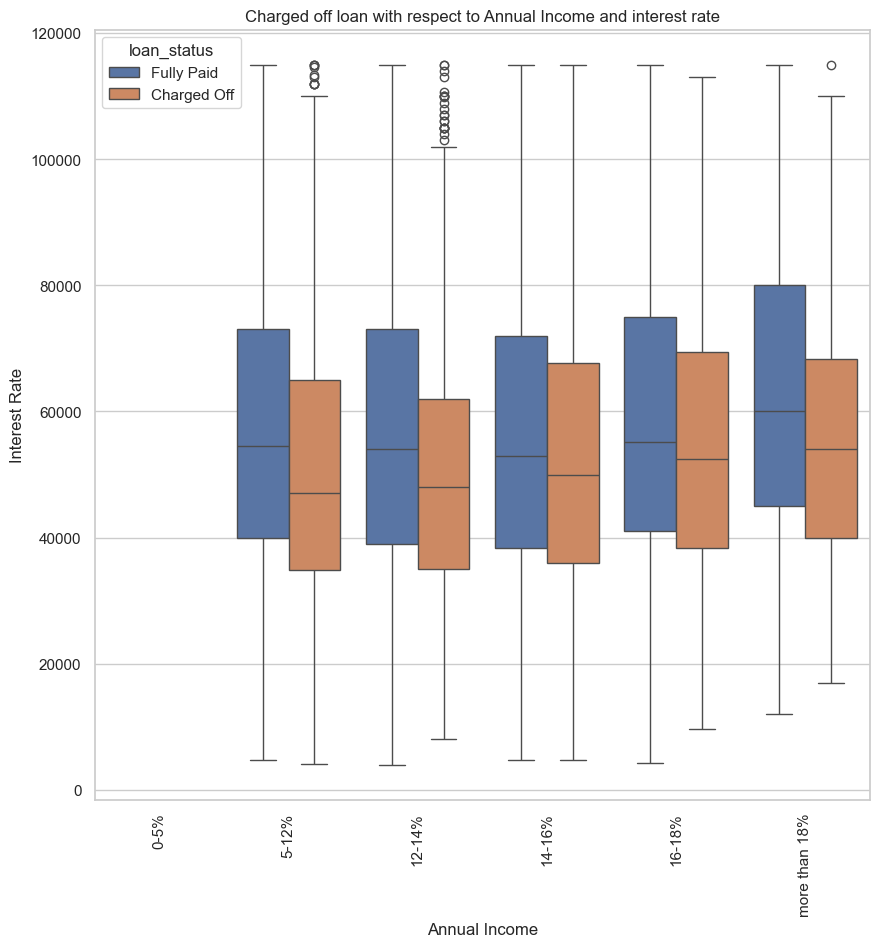

In [90]:
plt.figure(figsize=(10,10))
ax=sns.boxplot(data =loan,x='int_rate_group', y='annual_inc', hue ='loan_status',palette="deep")
plt.xlabel("Annual Income")
plt.ylabel("Interest Rate")
plt.xticks(rotation='vertical')
plt.title("Charged off loan with respect to Annual Income and interest rate")
plt.show()

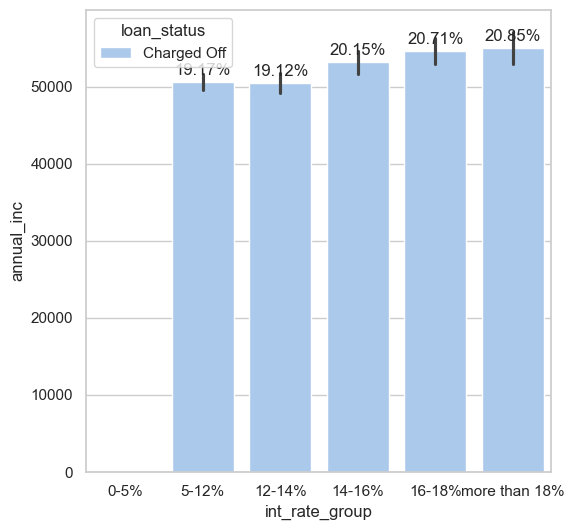

In [91]:
plt.figure(figsize=(6,6))
ax=sns.barplot(data =loan[loan.loan_status=='Charged Off'],x='int_rate_group', y='annual_inc', hue ='loan_status',palette="pastel")
showPercentageAnnotation(ax)
plt.show()

### 17. Analysis of loan amount and interest rate with respect to charged off loans

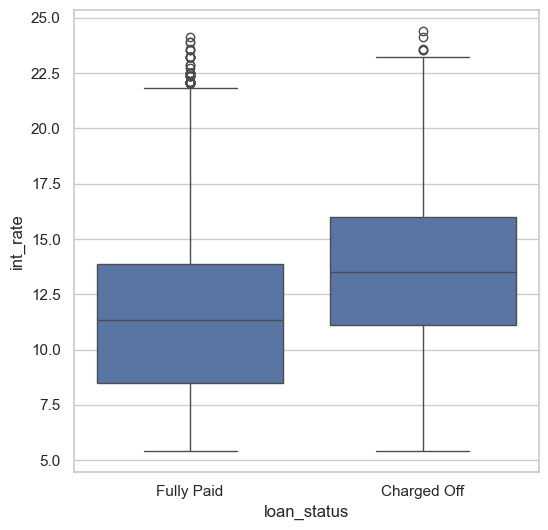

In [93]:
plt.figure(figsize=(6,6))
sns.boxplot(data=loan, y="int_rate",x="loan_status")
plt.show()

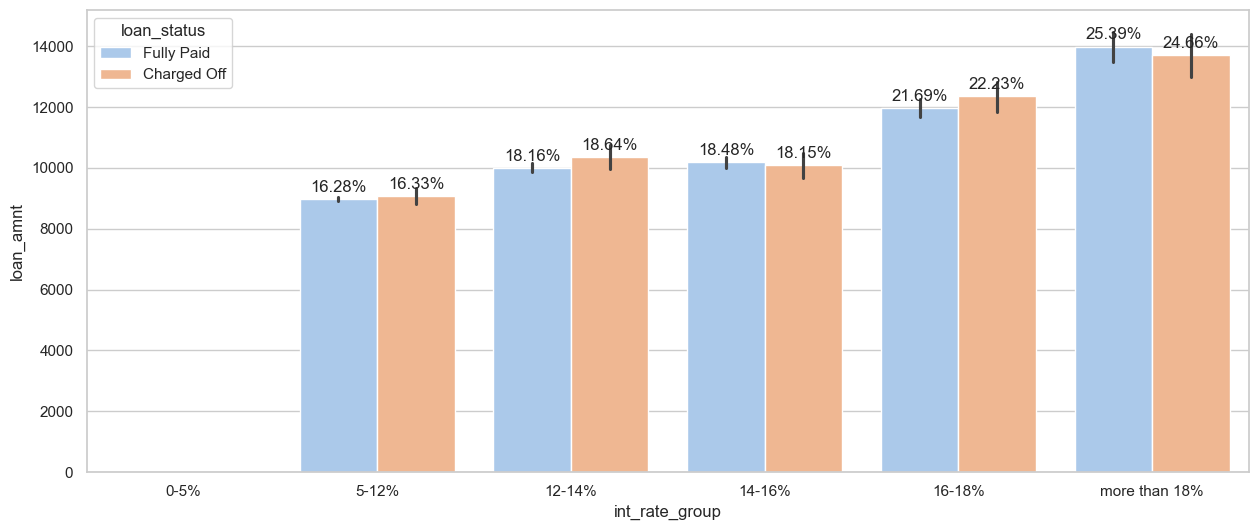

In [94]:
plt.figure(figsize=(15,6))
ax=sns.barplot(data =loan,x='int_rate_group', y='loan_amnt', hue ='loan_status',palette="pastel")
showPercentageAnnotation(ax)
plt.show()

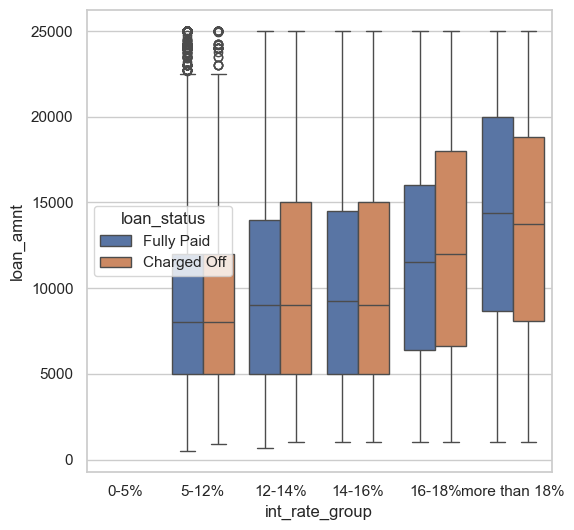

In [95]:
plt.figure(figsize=(6,6))
sns.boxplot(data=loan, y="loan_amnt", x="int_rate_group",hue="loan_status")
plt.show()

#### Same loan amount with interest 12-16% have same possibility of default. However higher the interest rate high chance of default

### 18. Analysis of loan amount and purpose with respect to charged off loans

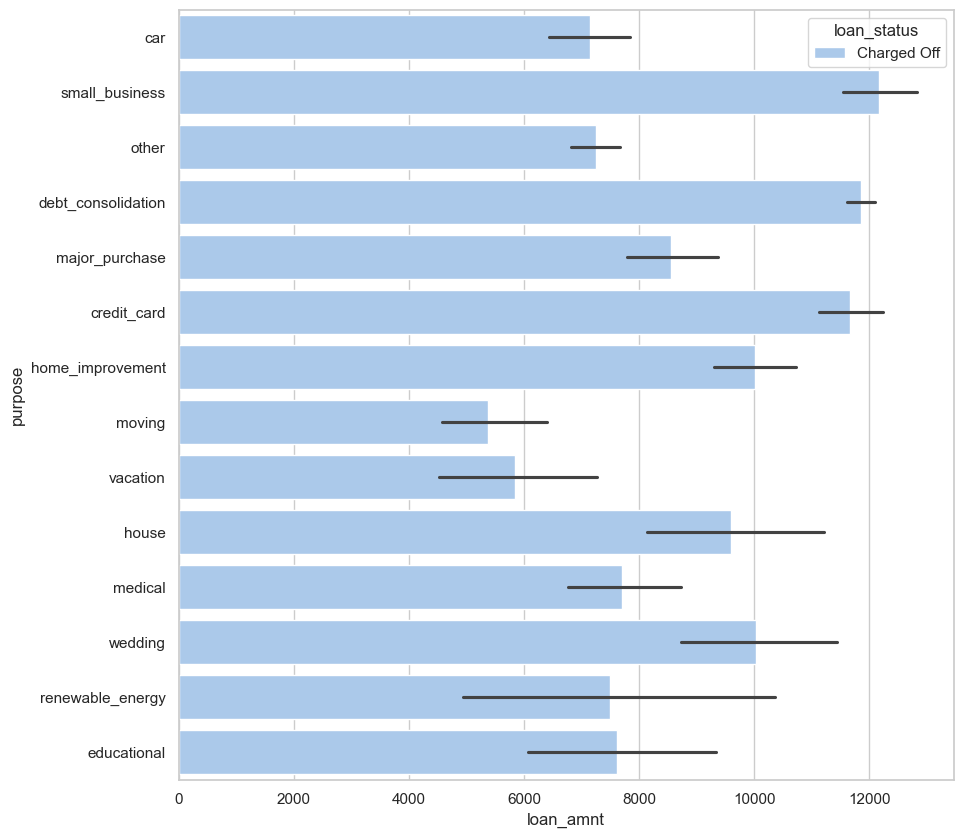

In [98]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data =loan[loan.loan_status=='Charged Off'],x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

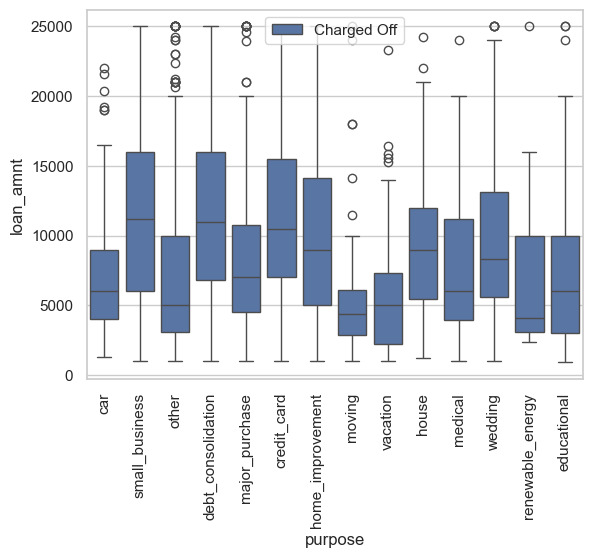

In [99]:
ax=sns.boxplot(data=loan[loan.loan_status=='Charged Off'], y="loan_amnt", x="purpose",hue="loan_status")
plt.xticks(rotation='vertical')
ax.legend(loc='upper center')
plt.show()

### 19. Analysis of loan amount and home ownership with respect to charged off loans

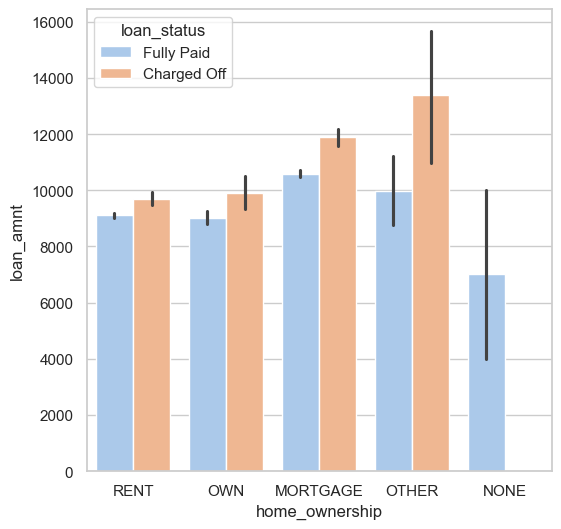

In [101]:
plt.figure(figsize=(6,6))
sns.barplot(data =loan,y='loan_amnt', x='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

<Axes: xlabel='home_ownership', ylabel='int_rate'>

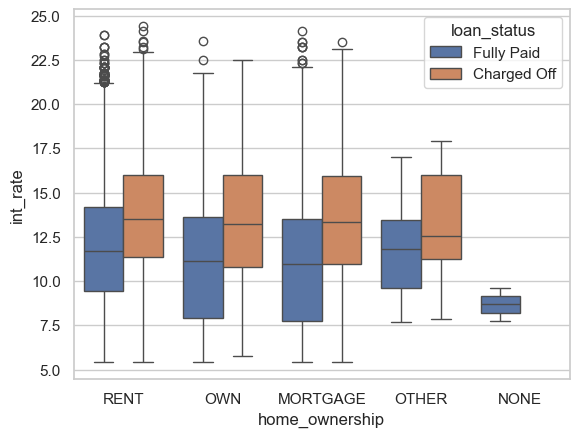

In [102]:
sns.boxplot(data=loan, y="int_rate", x="home_ownership",hue="loan_status")

### 20. Analysis of Grade and interest rate with respect to charged off loans

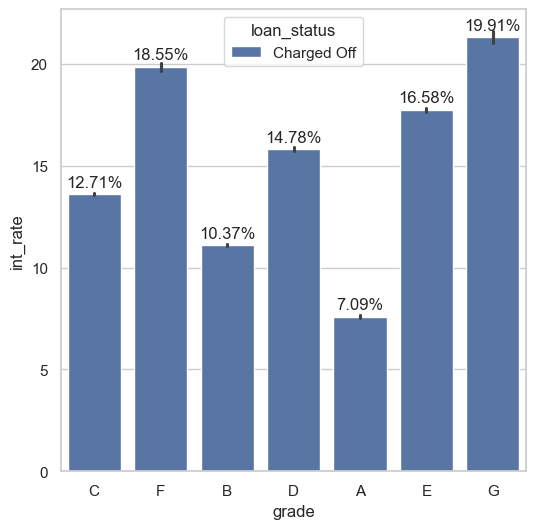

In [104]:
plt.figure(figsize=(6,6))
ax=sns.barplot(data =loan[loan.loan_status=='Charged Off'],x='grade', y='int_rate', hue ='loan_status',palette="deep")
showPercentageAnnotation(ax)
plt.show()

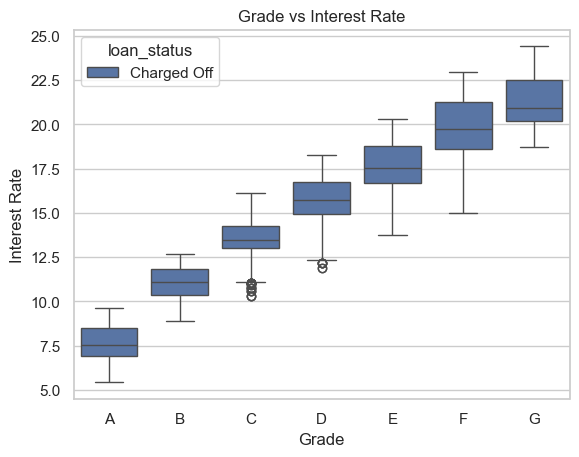

In [105]:
sns.boxplot(data =loan[loan.loan_status=='Charged Off'],x='grade', y='int_rate', hue ='loan_status',palette="deep",order=['A','B','C','D','E','F','G'])
plt.xlabel("Grade")
plt.ylabel("Interest Rate")
plt.title("Grade vs Interest Rate")
plt.show()

### 21. Analysis of open_acc

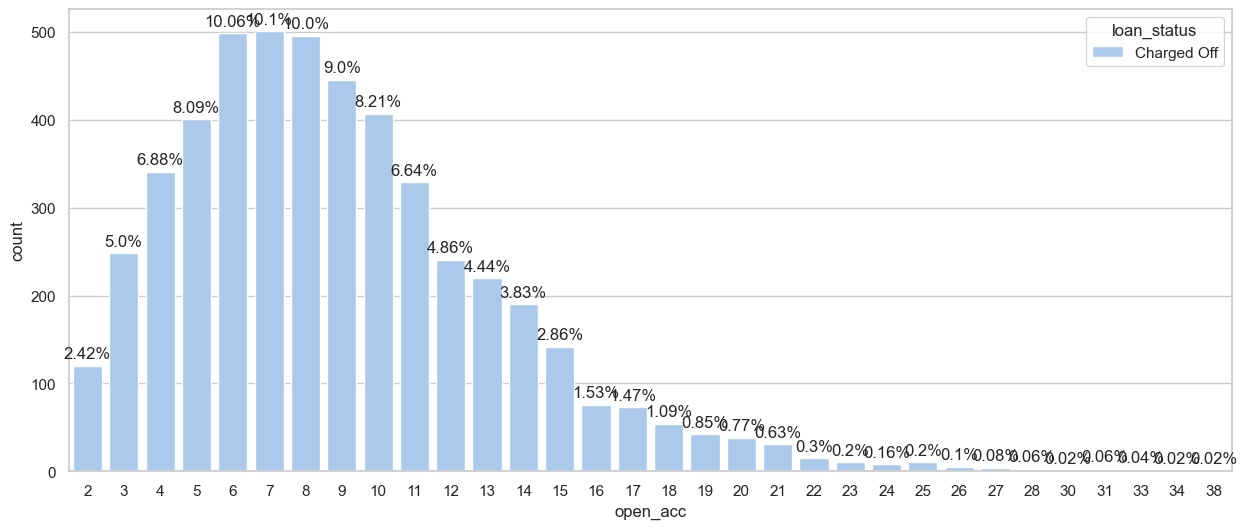

In [107]:
plt.figure(figsize=(15,6))
ax=sns.countplot(data =loan[loan.loan_status=='Charged Off'],x='open_acc', hue ='loan_status',palette="pastel")
showPercentageAnnotation(ax)
plt.show()


### 22. Analysis of pub_rec

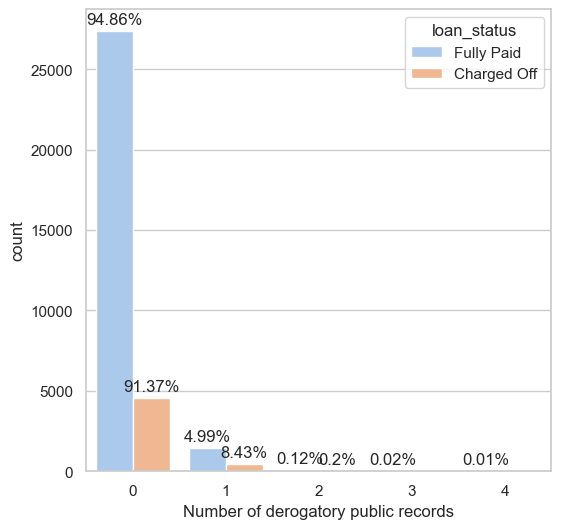

In [109]:
plt.figure(figsize=(6,6))
ax=sns.countplot(data =loan,x='pub_rec', hue ='loan_status',palette="pastel")
showPercentageAnnotation(ax)
plt.xlabel("Number of derogatory public records")
plt.show()


### 23. Analysis of address state

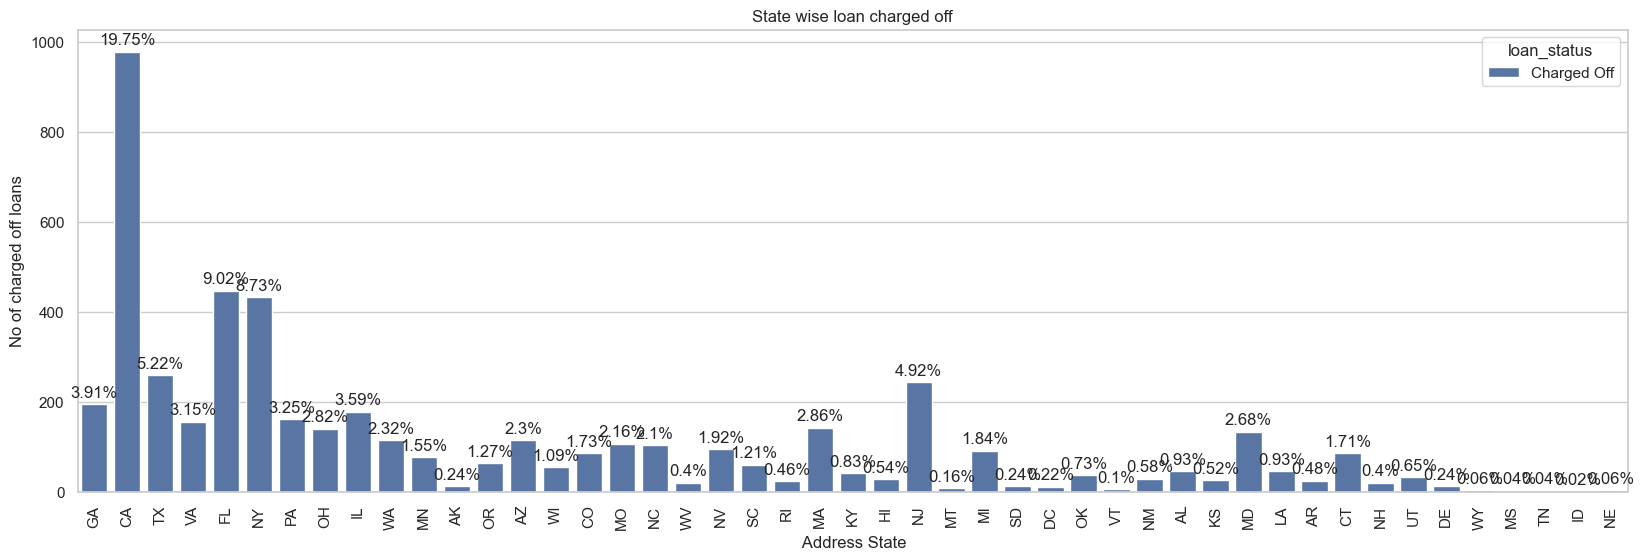

In [111]:
plt.figure(figsize=(20,6))
ax=sns.countplot(data =loan[loan.loan_status=='Charged Off'],x='addr_state', hue ='loan_status')
showPercentageAnnotation(ax)
plt.xticks(rotation='vertical')
plt.xlabel(" Address State")
plt.ylabel("No of charged off loans")
plt.title("State wise loan charged off")
plt.show()


### 24. Analysis on interest rate and term

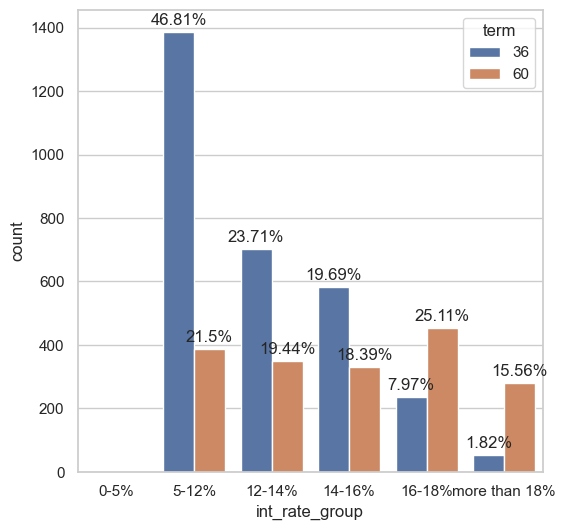

In [113]:
plt.figure(figsize=(6,6))
ax=sns.countplot(data =loan[loan.loan_status=='Charged Off'], x='int_rate_group', hue ='term',palette="deep")
showPercentageAnnotation(ax)
plt.show()

<Axes: xlabel='int_rate_group'>

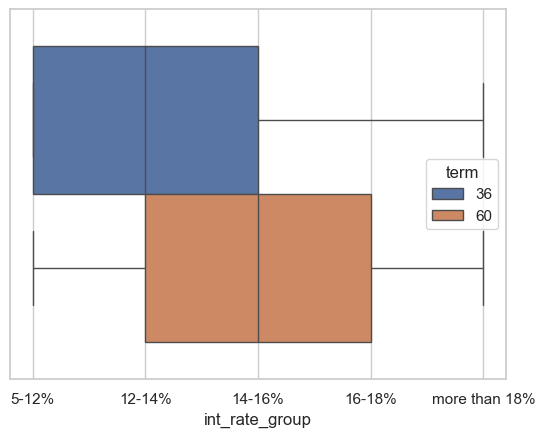

In [114]:
sns.boxplot(data =loan[loan.loan_status=='Charged Off'],hue='term', x='int_rate_group',palette="deep")

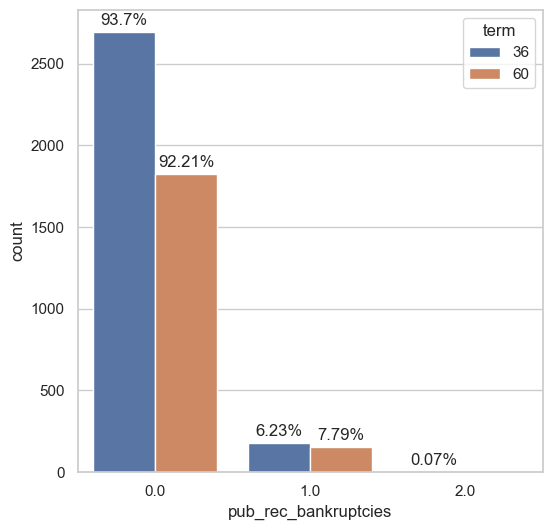

In [115]:
plt.figure(figsize=(6,6))
ax=sns.countplot(data =loan[loan.loan_status=='Charged Off'], x='pub_rec_bankruptcies', hue ='term',palette="deep")
showPercentageAnnotation(ax)
plt.show()

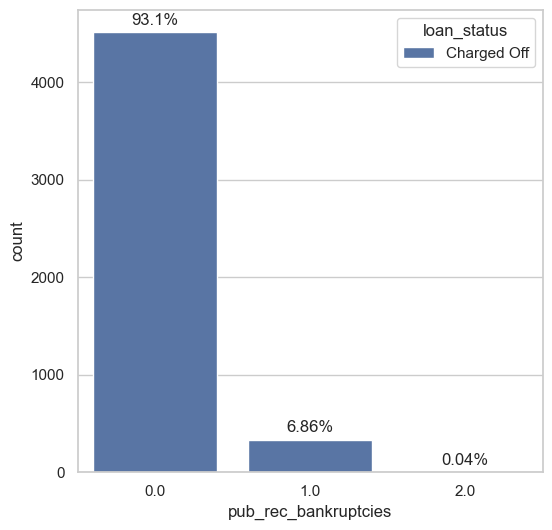

In [116]:
plt.figure(figsize=(6,6))
ax=sns.countplot(data =loan[loan.loan_status=='Charged Off'], x='pub_rec_bankruptcies', hue ='loan_status',palette="deep")
showPercentageAnnotation(ax)
plt.show()

## Observations from analysis:

1. Higher interest rate with higher term is most likely to default
2. Loan provided for CA,NY,FL address state is most likely to default.
3. Grade G higher interest rate
4. Debt reconsiliation, Credit Card and small business
5. Loan provided to Rent >50% is defaulted
6. Dti group 10-15
7. Employeement length of 10+